<p style="color:Blue; font-size: 20px; font-weight: bold; text-align: center"> MBAI 5300: Assignment-1 </p>
<p style="color:Black; font-size: 15px; font-weight: bold; text-align: center"> Value: 15%, Due: Oct. 8th @ 11:59 PM </p>

This assignment must be completed independently. Academic integrity is a core value at Ontario Tech University, and any form of plagiarism or cheating will be addressed in accordance with the Academic Integrity Policy (https://usgc.ontariotechu.ca/policy/policy-library/policies/academic/academic-integrity-policy.php).

**Academic misconduct includes, but is not limited to:**

* Using generative AI tools (e.g., ChatGPT, Copilot)
* Copying large portions of code from online or external sources

To confirm that your work is entirely your own, please include the following statement in the comment textbox when submitting your files on Canvas:

"***I have not given, received, or used any unauthorized assistance.***"

**GRADING CRITERIA**

Grades are awarded based on the following criteria:
* Program Correctness: 75%
* Code Efficiency: 10%
* Readability: 7.5%
* Documentation: 7.5%

1. **(10 Points)** Create a function named `longest_word` that accepts a string containing multiple words and returns the longest word in the string. If there are multiple words of the same maximum length, return the one that appears first.

    **Sample Input:**
    
    `text = "Make sure you enter the following verification code within the next 10 minutes verificatio"`

    **Sample output:**
    
    `longest_word(text)` should output `verification`.

In [5]:
def longest_word(text):
    # Normally we should remove all the symbols and split the text into a list, 
    # but it was not taught so I assume it's out of scope
    # divide the text with a space and put it in a list
    list = text.split(' ')
    print(list)
    longestLen = 0
    longestText = ''
    for text in list:
        if(len(text) > longestLen):
            longestLen = len(text)
            longestText = text
    return longestText

longest_word("Make sure you enter the following verification code within the next 10 minutes verificati12")   

['Make', 'sure', 'you', 'enter', 'the', 'following', 'verification', 'code', 'within', 'the', 'next', '10', 'minutes', 'verificati12']


'verification'

2. **(15 Points)** Create a function named `count_negatives` that counts the number of negative values in a NumPy array. The function should accept two arguments: a NumPy array and an optional `axis` parameter.

    * If `axis=0`, count the negative numbers in each **column**.
    * If `axis=1`, count the negative numbers in each **row**.
    * If no axis is specified, return the total count of negative numbers in the entire array.
    
   **Sample Input:**
      ```python
      arr = np.array([[2, -4, 3],
                      [-1, 6, -5],
                      [9, 0, -7]])
      ```
   **Sample output:**

    * `count_negatives(arr, axis=0)` should output `[1, 1, 2]`.
    * `count_negatives(arr, axis=1)` should output `[1, 2, 1]`.
    * `count_negatives(arr)` should output `4`.   

In [128]:
import numpy as np
def count_negatives(arr, axis = 2):
    # check if the array is less than or equal to 2-dimensional
    num_rows, num_cols = arr.shape
    result = np.zeros((1,num_rows), dtype = 'int')
    # print('initial result', result)
    j = 0
    sum = 0
    # print('num_rows',num_rows)
    # print('num_cols',num_cols)
    # print('axis', axis)
    # another approach: transpose it based on axis = 0 or 1
    if(axis == 0):
    #     # count negative numbers in columns  
        result = np.zeros(num_cols, dtype = 'int')
        # print('result', result)   
        # zipObj = zip(arr[j,:], range(num_rows))
        # print('zip', tuple(zipObj))
        while j < num_cols:
            # print('j', j)
            zipObj = zip(arr[:,j], range(num_rows))
            # print('zip j', j, tuple(zipObj))
            for value, i in zip(arr[:,j], range(num_rows)):
                # print("value, i, j", value, i, j)
                if(value < 0):
                    result[j]+=1
            j += 1;
        return result
    elif(axis == 1):
    #     # count negative numbers in rows
        result = np.zeros(num_rows, dtype = 'int')
        # print('new result', result)
        while j < num_rows:
            # print('j', j)
            for value, i in zip(arr[j, :], range(num_cols)):
                # print("value, i", value, i)
                if(value < 0):
                    result[j]+=1
            j += 1;
        return result
        
    else:
        newArr = arr.flatten()
        for value in newArr:
            if(value < 0):
             sum += 1
        return sum
        # print(arr[arr < 0] = -1)
        #count all negative numbers
    # print('result', result)


arr = np.array([[2, -4, 3],[-1, 6, -5],[9, 0, -7]])
# arr = np.array([[2, -4, 3, 0],
#                 [-1, 6, -5, 0]])

print('count_negatives, axis=0:', count_negatives(arr,0))
print('count_negatives, axis=1:', count_negatives(arr,1))
print('count_negatives with no axis:', count_negatives(arr))

count_negatives, axis=0: [1 1 2]
count_negatives, axis=1: [1 2 1]
count_negatives with no axis: 4


3. **(25 Points)** Write a function called `normalize_and_filter` that performs the following operations:

**Takes as input:**

* A list of numerical values.
* A threshold value (float).
* A Boolean flag return_indices (default False).

**The function should:**

* Convert the list to a NumPy array and normalize the array using z-score normalization (subtract the mean and divide by the standard deviation).

$$
z = \frac{x - \mu}{\sigma}
$$

* Filter and return all values greater than the given threshold after normalization.

* If `return_indices=True`, return the indices (from the original list) of the filtered values instead of the values themselves.

* Your function should return -1 if the standard deviation is 0.
    
**Sample Input:**
```python
data = [10, 25, 20, 15, 30]
threshold = 0.5
  ```
**Sample output:**
    
* `normalize_and_filter(data, threshold)` should output [25.0, 30.0] because the z-score normalization values for 25 and 30 are higher than 0.5.  

* `normalize_and_filter(data, threshold, return_indices=True)` should output [1, 4].

In [145]:
import numpy as np
def normalize_and_filter(data, threshold, return_indices=False):
    # error check if it's one-dimensional array
    arr = np.array(data)
    mean = arr.mean()
    std = arr.std()
    result = []
    print('mean', mean)
    print('std', std)
    for i, value in enumerate(data):
        x = (value - mean) / std
        print('i, value', i, value)
        if(x >= threshold):
            if(return_indices == True):
                result.append(i)
            else:
                result.append(value)
    return result

print(normalize_and_filter([10, 25, 20, 15, 30], 0.5))
print(normalize_and_filter([10, 25, 20, 15, 30], 0.5, True))
    

mean 20.0
std 7.0710678118654755
i, value 0 10
i, value 1 25
i, value 2 20
i, value 3 15
i, value 4 30
[25, 30]
mean 20.0
std 7.0710678118654755
i, value 0 10
i, value 1 25
return_indices True
i, value 2 20
i, value 3 15
i, value 4 30
return_indices True
[1, 4]


4. **(50 Points)** The file `air-quality-index.csv` contains Air Quality Index (AQI) values for various countries across the years 2000, 2006, 2012, and 2021. Using Pandas, perform the following analyses:

    a) Identify countries that had an AQI value greater than 150 in either 2000 or 2006. Your code should output a list of these countries.

    b) Find countries with AQI values greater than 150 in both 2000 and 2006. Calculate their average AQI over these two years. Your output should include the country names alongside their average AQI values.

    c) Calculate the global average AQI for each year from 2000 to 2021 and create a bar or line plot to visualize these trends.

    d) Compute the average AQI between 2000 and 2021 for India, China, the United States, Brazil, and Russia. Generate a bar plot showing these averages in descending order. (Hint: use sort_values() to order the results.)

    e) For the year 2021, categorize countries based on their AQI values into:

        Unhealthy: AQI ≥ 150
        Moderate: AQI between 100 and 150
        Good: AQI ≤ 100
   Determine the count of countries in each category and plot a pie chart illustrating the distribution.

In [19]:
import pandas as pd
airData = pd.read_csv("air-quality-index.csv")
#a
threshold = 150
AQIGreaterThan150FilterIn2000or2006 = ((airData["2000"] >= threshold) |
                      (airData["2006"] >= threshold) )
AQIGreaterThan150In2000or2006 = airData[AQIGreaterThan150FilterIn2000or2006]
AQIGreaterThan150In2000or2006
# high_salary_engineers = majors_df.loc[high_salary_filter, ["Major","Median"]]
# high_salary_engineers
# airData.head()
# #a
# airData

,Country,2000,2006,2012,2021
0,India,150,170,180,200
1,China,200,210,190,210
10,Nigeria,160,165,170,180
17,Indonesia,190,200,210,220
22,Philippines,150,160,170,175
24,Vietnam,160,165,170,175
25,Pakistan,180,190,200,210
26,Iran,140,150,160,170
28,Bangladesh,155,160,165,170
49,Qatar,150,160,170,180


In [18]:
#b
AQIGreaterThan150FilterIn2000and2006 = ((airData["2000"] >= threshold) &
                      (airData["2006"] >= threshold) )
AQIGreaterThan150In2000and2006 = airData[AQIGreaterThan150FilterIn2000and2006]
average = (AQIGreaterThan150In2000and2006["2000"] + AQIGreaterThan150In2000and2006["2006"])/2
result = pd.DataFrame({
    "Country": AQIGreaterThan150In2000and2006.Country,
    "AverageOver2000and2006": average
})
result




,Country,AverageOver2000and2006
0,India,160.0
1,China,205.0
10,Nigeria,162.5
17,Indonesia,195.0
22,Philippines,155.0
24,Vietnam,162.5
25,Pakistan,185.0
28,Bangladesh,157.5
49,Qatar,155.0


2000     85.2
2006     91.8
2012     96.6
2021    103.2
dtype: float64


<Axes: title={'center': 'Average AQI by Years'}, ylabel='Average AQI'>

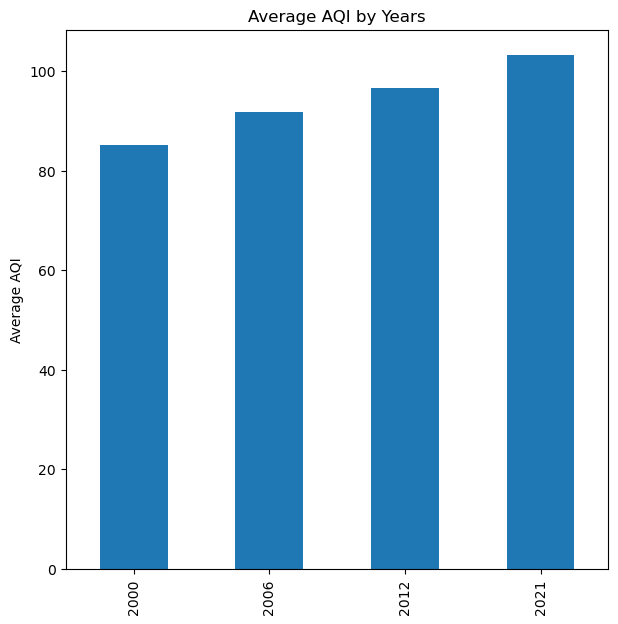

In [59]:
#c) Calculate the global average AQI for each year from 2000 to 2021 and create a bar or line plot to visualize these trends.
globalAverage= airData.iloc[:, 1:].mean()
print(globalAverage)

globalAverage.plot(kind = 'bar', ylabel = "Average AQI", title = 'Average AQI by Years', figsize =(7, 7))

filteredData
          Country  2000  2006  2012  2021
0          India   150   170   180   200
1          China   200   210   190   210
2  United States    75    80    85    90
3         Brazil   100   110    95   100
4         Russia    90    95    80    85
averageByCountries
 0    175.00
1    202.50
2     82.50
3    101.25
4     87.50
dtype: float64
combined          Country  Average
0          India   175.00
1          China   202.50
2  United States    82.50
3         Brazil   101.25
4         Russia    87.50


<Axes: title={'center': 'Average AQI by Countries'}, xlabel='Country', ylabel='Average AQI'>

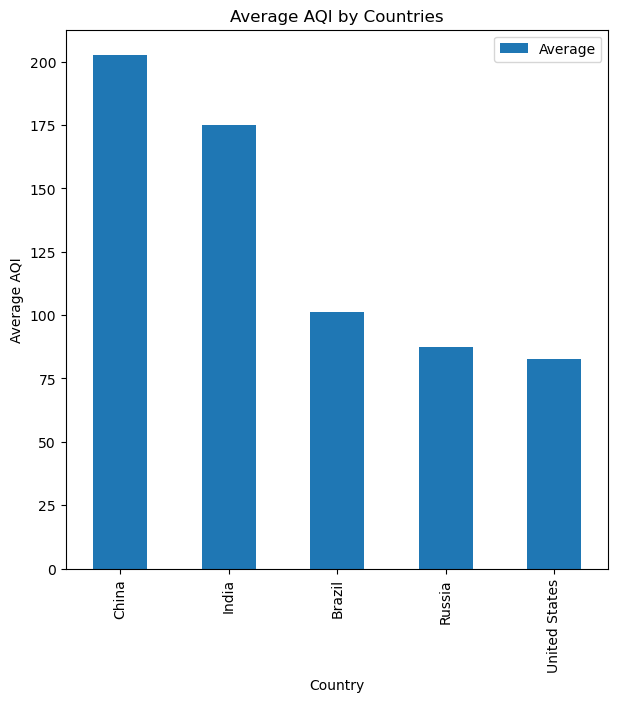

In [62]:
#d) Compute the average AQI between 2000 and 2021 for India, China, 
# the United States, Brazil, and Russia. 
# Generate a bar plot showing these averages in descending order. (Hint: use sort_values() to order the results.)
desiredCountries = ["India", "China",  "United States", "Brazil", "Russia"]
# filter = (airData.Country == "India" | airData.Country == "Chine" | airData.Country == "United States" | airData.Country == "Brazil" | airData.Country == "Russia" )
filter = ((airData.Country == "India") | (airData.Country == "China") | 
         (airData.Country == "United States") | (airData.Country == "Brazil") | (airData.Country == "Russia"))
filteredData = airData[filter]
print('filteredData\n',filteredData)
averageByCountries = filteredData.iloc[:, 1:].mean(axis=1)
print("averageByCountries\n", averageByCountries)

# df_new_row = pd.DataFrame([new_row])
# new_df = pd.concat([employees_df, df_new_row], axis = 0, ignore_index=True) #  ignore_index=True: avoid duplicate indices
# new_df

combined = pd.DataFrame({
    "Country": desiredCountries,
    "Average": averageByCountries
}) 
print('combined', combined)
combined.sort_values("Average", ascending=False).plot(kind = 'bar', ylabel = "Average AQI", title = 'Average AQI by Countries', x = 'Country', figsize =(7, 7))



In [ ]:
#e) For the year 2021, categorize countries based on their AQI values into:

#  Unhealthy: AQI ≥ 150
#  Moderate: AQI between 100 and 150
#  Good: AQI ≤ 100
# Determine the count of countries in each category and plot a pie chart illustrating the distribution.